# Проект: Исследование стартапов

## Введение

 Заказчик - Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.
 
 
Предоставленные данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

*Цель проекта* - Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

*Необходимо принять решения:*
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.
- выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.


В процессе работы старайтесь записывать свои рассуждения — это полезная привычка во время обучения. Пользуйтесь общими правилами:

- начните с введения, в котором опишите контекст и цели проекта в целом;
- записывайте в комментариях к коду всё, что относится к нему или алгоритму;
- основания совершаемых в проекте действий и выводы, которые касаются предмета исследования, — записывайте в ячейках типа Markdown;
- после каждого крупного раздела — шага проекта — обязательно формулируйте промежуточные выводы.

## Описание данных

**Таблица acquisition**

Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

**Таблица company_and_rounds**

Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

**Таблица education**

Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

**Таблица people**

Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

**Таблица degrees**

Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv




### 1.1. Вывод общей информации, исправление названия столбцов

- загружаем данные
- Проверяем названия столбцов.
- Вывводим информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [57]:
# загрузка библиотек 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from phik import phik_matrix
import numpy as np

In [58]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
df_edu = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [59]:
# выведем названия столбцов каждого датасета
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [60]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [61]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [62]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [63]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [64]:
df_company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [65]:
# приведем названия стобцов к нужному виду
df_company_and_rounds = df_company_and_rounds.rename(columns = {'company  ID' : 'company_id','category  code' : 'category_code', 'founded  at' : 'founded_at',
       'closed  at' : 'closed_at', 'network  username' : 'network_username', 'country  code' : 'country_code',
       'investment  rounds' : 'investment_rounds', 'funding  rounds' : 'funding_rounds', 'funding  total' : 'funding_total', 
       'funding  round  id' : 'funding_round_id', 'company  id' : 'company_id_rounds', 'funded  at' : 'funded_at',
       'funding  round  type' : 'funding_round_type', 'raised  amount' : 'raised_amount', 'pre  money  valuation' : 'pre_money_valuation',
       'is  first  round' : 'is_first_round', 'is  last  round' : 'is_last_round'})

In [66]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [67]:
df_company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [69]:
df_edu.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [70]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


- Загрузили все необходимые данные по проекту
- Проверили  названия столбцов и привели названия столбцоы датасета `df_company_and_rounds` к нужному формату
- Вывели информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов


### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [71]:
# Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо
# df_acquisition- object to datetime
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])

df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'])
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'])
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'])

df_edu['graduated_at'] = pd.to_datetime(df_edu['graduated_at'])

In [72]:
# анализ пропусков
display(df_company_and_rounds.shape[0])
display(df_company_and_rounds.isna().sum())
display(df_company_and_rounds.isna().sum() / len(df_company_and_rounds))

217774

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_rounds      164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_rounds      0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [73]:
display(df_acquisition.shape[0])
display(df_acquisition.isna().sum())
display(df_acquisition.isna().sum() / len(df_acquisition))

9407

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [74]:
display(df_people.shape[0])
display(df_people.isna().sum())
display(df_people.isna().sum() / len(df_people))

226709

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [75]:
display(df_edu.shape[0])
display(df_edu.isna().sum())
display(df_edu.isna().sum() / len(df_edu))

109610

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [76]:
display(df_degrees.shape[0])
display(df_degrees.isna().sum())
display(df_degrees.isna().sum() / len(df_degrees))

109610

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

- Заменили тип данных `object` столбцов с  датой и временем на тип `datetime64` 
- Анализ пропусков:
1. `df_acquisition`:  Всего в датаесете 9407 строк . Пропуски содержатся в двух столбцах, значительная часть которых содежится в стобце `term_code` (80%) - формы расчета.
2. `df_company_and_rounds`: Всего в датаесете 217 774 строк . Причем пропуски содержатся во всех столбцах, значительная часть которых находится в  
3. `df_people`: Всего в датаесете 226 709 строк. Пропуски содержатся в 4 столбцах, значительная часть которых содежится в стобцах в `company_id` и `network_username`(из-за возможного отсуствия сотрудника в соц сетях)- более 80%.
4. `df_edu`: Всего в датаесете 109 610 строк. Пропуски содержатся в двух столбцах, из них в столбце  `graduated_at`- около 50% пропусков
5. `df_degrees`: Всего в датаесете 109 610 строк. Пропуски содержатся в двух столбцах- degree_type(10%)	subject(26%)- что тоже является существенной проблемой для дальнейшего исследдования проекта.

Исходя из анализа пропусков во всех датасетах, следует сделать вывод о том, что во всех датасетах присутствуют столбцы с существенным количеством пропусков , которые нельзя удалить. 

Предоставленные данные изначально неполны, поэтому в процессе исследования значений показателей , выводы могут быть неточными.



## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [77]:
# выделим год основания
df_company_and_rounds['funded_year'] = df_company_and_rounds['funded_at'].dt.year
#Cоставим сводную таблицу 
pivot_table_company_rounds = df_company_and_rounds.pivot_table(index = 'funded_year', values= ['funding_round_id','raised_amount'] ,aggfunc = {'raised_amount' : 'median', 'funding_round_id': 'count' }).reset_index()

pivot_table_company_rounds.columns = ['year', 'total_rounds', 'avg_raised_amount']
# Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования
rounds_table_by_year = pivot_table_company_rounds[pivot_table_company_rounds['total_rounds'] > 50]
display(rounds_table_by_year)

,year,total_rounds,avg_raised_amount
15,1999.0,76,2000000.0
16,2000.0,125,4200000.0
17,2001.0,96,3000000.0
18,2002.0,116,4200000.0
19,2003.0,159,3000000.0
20,2004.0,291,5000000.0
21,2005.0,1633,5500000.0
22,2006.0,2436,5000000.0
23,2007.0,3279,3973320.0
24,2008.0,3774,3110000.0


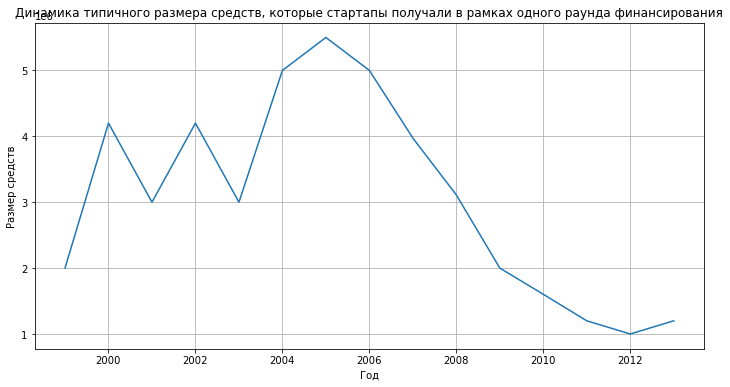

In [78]:
# график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

rounds_table_by_year.plot(kind = 'line', x= 'year', y = 'avg_raised_amount', title = 'Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования', xlabel = 'Год', ylabel = 'Размер средств', figsize  = (12,6), legend = False)
plt.grid()

- Максимальный типичный размер собранных в рамках одного раунда средств был в 2005 году- 5 500 000
- В 2013 году после начавшейся понижательной тенденции в 2006 г типичный размер собранных в рамках одного раунда средств увеличился по сравнению с прошлым годом - 1 200 000. Причем по количеству раундов 2013 год является максимальным - 11 072.



### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [79]:
# объединим датасеты
df_merge_edu = df_people.merge(df_edu, left_on = 'id', right_on = 'person_id', how = 'left')
# создадим столбец с отсутсвием информации об образовании у сотрудников
df_merge_edu['no_edu_info'] = df_merge_edu['instituition'].isna().astype('int64')
df_merge_edu

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_edu_info
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,1
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,0
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,0
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,1


In [80]:
# разделим все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп
grouped_edu = df_merge_edu.groupby('company_id', as_index = False).agg({'id_x' : 'nunique', 'no_edu_info' : 'sum'}).sort_values(by = 'id_x', ascending = False)
grouped_edu.columns = ['company_id', 'total_emploees', 'no_edu_info']
grouped_edu['no_edu_share'] = grouped_edu['no_edu_info'] * 100 / grouped_edu['total_emploees']
display(grouped_edu)

,company_id,total_emploees,no_edu_info,no_edu_share
48,59.0,244,76,31.147541
25,29.0,150,40,26.666667
777,1242.0,138,37,26.811594
20605,231067.0,72,14,19.444444
378,499.0,63,20,31.746032
...,...,...,...,...
10480,63585.0,1,1,100.000000
2432,7258.0,1,0,0.000000
10478,63581.0,1,1,100.000000
10477,63580.0,1,0,0.000000


In [81]:
# рассмотрим распределение количества сотрудников
grouped_edu['total_emploees'].value_counts()

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
20         3
15         3
23         3
18         3
19         3
21         2
25         2
29         2
56         2
22         2
150        1
48         1
138        1
72         1
63         1
61         1
51         1
39         1
47         1
36         1
35         1
32         1
31         1
26         1
244        1
Name: total_emploees, dtype: int64

In [82]:
# проведем категоризацию компаний
def category_companies(value):
    if value == 1:
        return '1'
    elif value == 2:
        return '2'
    elif value == 3:
        return '3'
    elif (value == 4) | (value == 5):
        return '4-5'
    elif (value >= 6) & (value <= 10):
        return '6-10'
    elif (value >= 11) & (value <= 25):
        return '11-25'
    elif value >= 26:
        return '26+'
    
grouped_edu['type_company'] = grouped_edu['total_emploees'].apply(category_companies)

category_companies = grouped_edu.groupby('type_company').agg({'no_edu_share' : 'mean', 'total_emploees' : 'count'})



In [83]:
category_companies.columns = ['no_edu_share_avg', 'total_companies']
category_companies.sort_values(by = 'total_companies', ascending = False)

,no_edu_share_avg,total_companies
type_company,,
1,46.337694,18117
2,46.696198,2709
3,48.787550,921
4-5,49.796215,687
6-10,53.260438,368
11-25,45.965982,101
26+,26.838996,19


- Так как  распределение данных показывает, что больше всего стартапов и небольшое количество крупных компаний, Была проведена категоризация компаний по cледующей классификаций компаний: 
1. '1' - Численность работников - 1
2. '2' - Численность работников - 2
3. '3'- Численность работников - 3
4. '4-5' - Численность работников 4–5 человек. 
5. '6-10'- Численность работников 6–10 человек. 
6. '11-25'- Численность работников 11–25 человек. 
7. '26+ - Численность работников 26+ человек. 

- После группировки и категоризации данных следует сделать вывод о том, что больше всего компаний являются стартапами- такие компании содержат 1-5 сотрудников, в данной категории одна из больших средних долей сотрудников без информации об образовании. Крупных компаний значительно меньше( численность сотрудников от 11+), однако средняя доля сотрудников без информации об образовании у таких компаний меньше.

- Также для выполнения данного задания  можно присоединить таблицу degrees.csv, чтобы получить более развернутую информацию об образовании. Однако у нас слишком мало данных и для нашего исследования это не нужно.


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [84]:
# network_username содержится в двух датасетах(people.csv и company_and_rounds.csv)
# уберем пропуски в столбце network_username для исследования и посчитаем количество уникальных и неуникальных значений в нем
df_network_company_noNA = df_company_and_rounds['network_username'].dropna()

display(df_network_company_noNA)
display(df_network_company_noNA.nunique())
display(df_network_company_noNA.count())


0         BachelrWetpaint
1         BachelrWetpaint
2         BachelrWetpaint
9                Hostnine
11              getvetter
               ...       
217467            network
217468          pPhotonet
217469           Photonet
217470           Photonet
217471           Photonet
Name: network_username, Length: 95534, dtype: object

79571

95534

In [85]:
# network_username содержится в двух датасетах(people.csv и company_and_rounds.csv)
# уберем пропуски в столбце network_username для исследования и посчитаем количество уникальных и неуникальных значений в нем
df_network_people_noNA = df_people['network_username'].dropna()

display(df_network_people_noNA)
display(df_network_people_noNA.nunique())
display(df_network_people_noNA.count())


6         jobsbostontech
8             fbroulette
16        adam_beckerman
17            netcastles
18        OguzKaganAslan
               ...      
226702      peterlalonde
226705           network
226706    itechsocialnet
226707     socialnethubs
226708    esocialnetlike
Name: network_username, Length: 38867, dtype: object

38421

38867

In [86]:
set1 = set(df_network_company_noNA)
set2 = set(df_network_people_noNA)

intersect_sets = set1.intersection(set2) 
intersect_sets = list(intersect_sets)
len(intersect_sets)

2199

В результате мы получаем, что количество совпадений столбца `network_username`  в таблицах `people.csv` и  `company_and_rounds.csv` равно 2199. При этом количество неуникальных значений равно, cоответственно, 38867  и 95 534 . Значит можно сделать вывод о. том, что  использовать столбцы с именем network_username для объединения данных не следует.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [87]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [88]:
# разделим датасет на две таблицы и в каждой из них удалим явные дубликаты
# таблица компаний
df_company = df_company_and_rounds.loc[:, :'milestones']
df_company = df_company.drop_duplicates()
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [89]:
df_company = df_company.sort_values(by = 'company_id')
df_company.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
63280,2.0,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
153920,3.0,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
217286,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0


In [90]:
#таблица раундов финансирования
df_fund_rounds = df_company_and_rounds[['funding_round_id', 'company_id_rounds', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_year']]

df_fund_rounds = df_fund_rounds.drop_duplicates()
df_fund_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_rounds    52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


In [91]:
df_fund_rounds
df_fund_rounds = df_fund_rounds.sort_values(by = 'funding_round_id')
df_fund_rounds.head()

,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
165414,1.0,4.0,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2006.0
217286,2.0,5.0,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0
217287,3.0,5.0,2005-05-01,series-a,12700000.0,115000000.0,3.0,0.0,0.0,2005.0
217288,4.0,5.0,2006-04-01,series-b,27500000.0,525000000.0,4.0,0.0,0.0,2006.0
202858,5.0,7299.0,2006-05-01,series-b,10500000.0,0.0,2.0,0.0,0.0,2006.0


Для того , чтобы в дальнейшем проводить анализ в разрезе отдельных компаний таблица company_and_rounds.csv была разделена на две. таблицы, так как скорее всего изначально было две таблицы, а после присоединения получилась большая таблица с огромным количество пропусков, а также на это указывает наличие двух одинаковых столбцов - `company_id`. В каждой из таблиц были удалены явные дубликаты и была произведена сортировка по `company_id`(df_company) и `funding_round_id`(df_fund_rounds).


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [92]:
# отфильтруем датасет df_company 
df_2_company = df_company[((df_company['funding_rounds'] > 0) | (df_company['investment_rounds'] > 0)) | (df_company['status'] == 'acquired')]
df_2_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 152354
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

В результате фильтрации получаем датаест , состоящий из 40747 строк и 13 столбцов. 


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [93]:
df_2_company.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
217286,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
199822,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0
209255,8.0,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.000000e+00,0.0


In [94]:
df_2_company['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

В методе describe указаны основные показатели столбца `funding_total`(сумма финансирования). Максимальное значение суммы финасирования равняется 5 700 000 000 USD. А минимальное значение равняется 0 .Из-за этого Стандартное отклонение очень большое, а также присутствует существенное отличие между средним значением и медианой(среднее значение- 10 135 610 намного больше медианы - 600 000, что свидетельствует о ассиметричности распределения.

Для дальнейшего анализа распределения для нахождения типичных значений следует избавиться от выбросов (макс значение)

In [95]:
df_2_company['funding_total'].describe(percentiles = [0.25, 0.50, 0.99])

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
99%      1.339487e+08
max      5.700000e+09
Name: funding_total, dtype: float64

Text(0, 0.5, 'Количество компаний')

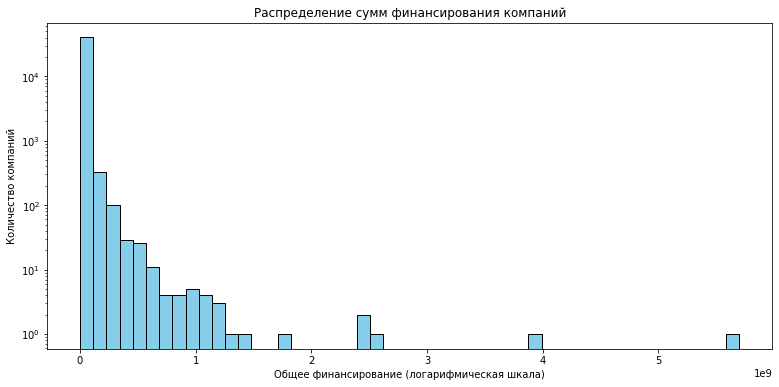

In [96]:
df_2_company['funding_total'].plot(kind = 'hist', color = 'skyblue', edgecolor = 'black', bins = 50, figsize = (13,6), title = 'Распределение сумм финансирования компаний', log = True)


plt.xlabel('Общее финансирование (логарифмическая шкала)') 
plt.ylabel('Количество компаний')

<AxesSubplot:>

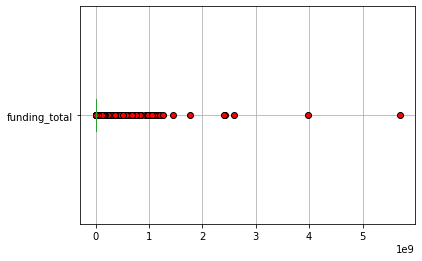

In [97]:
df_2_company.boxplot(column = 'funding_total', vert= False, flierprops = dict(markerfacecolor = 'red', marker = 'o'))

<AxesSubplot:>

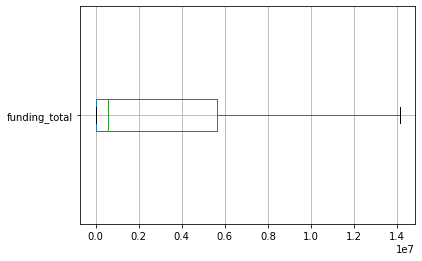

In [98]:
df_2_company.boxplot(column = 'funding_total', vert= False, showfliers=False)

Распределение ассиметричное с правым хвостом, из графика можно заметить, что общее финансирование компаний близится к нулю.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [99]:
df_3 = df_2_company.merge(df_acquisition, how = 'left', left_on = 'company_id', right_on = 'acquired_company_id')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

In [100]:
# фильтруем покупки за 0 или 1 доллар
df_3_new = df_3[((df_3['price_amount'] == 0) | (df_3['price_amount'] == 1)) & (df_3['funding_total'] > 0)]
df_3_new.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5,9.0,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,16500000.0,4.0,7954.0,687.0,9.0,NaN,0.0,2012-11-28
9,13.0,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,4283.0,20.0,13.0,NaN,0.0,2007-05-30
11,14.0,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0.0,3.0,18100000.0,4.0,2692.0,37730.0,14.0,NaN,0.0,2009-12-15
19,23.0,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0.0,1.0,45000000.0,5.0,2622.0,3396.0,23.0,NaN,0.0,2009-11-24
32,38.0,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0.0,4.0,23350000.0,2.0,5075.0,475.0,38.0,NaN,0.0,2011-01-31


In [101]:
df_3_new.groupby('price_amount').agg({'company_id' : 'count', 'funding_total' : 'median'})

,company_id,funding_total
price_amount,,
0.0,1618,6000000.0


После группировки по цене покупки можно заметить что есть покупки только за 0 долларов- 1618 компаний.

In [102]:
#  верхняя и нижняя граница выбросов для столбца funding_total
Q1 = df_3_new['funding_total'].quantile(0.25)
Q3 = df_3_new['funding_total'].quantile(0.75)
IQR = Q3 -Q1

upper_bound = Q3 +1.5 *IQR

bottom_bound = Q1- 1.5 * IQR

print(f'границы выбросов: {upper_bound}, {bottom_bound}')

границы выбросов: 35750000.0, -18250000.0


In [103]:
lower_percentile = (df_3_new['funding_total'] < bottom_bound).sum()/ len(df_3_new)* 100
higher_percentile = (df_3_new['funding_total'] > upper_bound).sum()/ len(df_3_new)* 100

print(f' Процент данных выше/ниже границ: {higher_percentile}, {lower_percentile}' )

 Процент данных выше/ниже границ: 9.085290482076639, 0.0


Для покупок за 0 или 1 доллар:
Верхняя граница столбца `funding_total` - 35 750 000, выше этой границы находится около 9% значений, соответсвенно 91% находится ниже этих значений

Нижняя граница столбца `funding_total` - 0, так как отрицательная сумма не может существовать, Процент данных ниже нижней границы 0.0%



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [104]:
df_category = df_3[df_3['price_amount'] > 0]
df_category.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12
4,8.0,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.0,0.0,419.0,59.0,8.0,cash,625000000.0,2007-07-09
6,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
10,13.0,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,5984.0,13.0,13.0,NaN,29000000.0,2009-04-01
14,18.0,Lala,games_video,acquired,NaT,NaT,lala.com,NaN,USA,0.0,4.0,44150000.0,6.0,2657.0,1654.0,18.0,cash_and_stock,80000000.0,2009-12-05


In [105]:
df_category['price_amount'].describe()

count    2.473000e+03
mean     1.495976e+09
std      5.230439e+10
min      1.000000e+00
25%      1.270000e+07
50%      5.600000e+07
75%      2.650000e+08
max      2.600000e+12
Name: price_amount, dtype: float64

Среднее значение суммы покупки сильно отличается от медианы,  а также отклонение является очень большим из-за выбросов. 

In [106]:
quantile_1 = df_category['price_amount'].quantile(0.01)
quantile_99 = df_category['price_amount'].quantile(0.99)

In [107]:
#выведем датасет без 99 и 1 процентилей 
df_category_1 = df_category[(df_category['price_amount'] < quantile_99) & (df_category['price_amount'] > quantile_1)]

In [108]:
#распределение цен
df_category_1['price_amount'].value_counts()

1.000000e+07    44
3.000000e+07    38
5.000000e+07    37
2.000000e+07    36
1.000000e+08    30
                ..
7.270000e+07     1
1.042100e+08     1
4.804000e+08     1
1.136700e+09     1
5.240000e+07     1
Name: price_amount, Length: 1005, dtype: int64

In [109]:
df_4 = df_category_1.groupby('category_code').agg(meadian_price = ('price_amount' , 'median') ,std_price = ('price_amount', 'std')).reset_index()
df_4.sort_values(by = 'meadian_price', ascending = False)

,category_code,meadian_price,std_price
2,automotive,2.400000e+09,2.581669e+09
33,sports,6.225000e+08,5.126524e+08
21,nanotech,5.840000e+08,NaN
16,manufacturing,4.185000e+08,1.071033e+09
27,real_estate,4.000000e+08,2.676302e+09
34,transportation,2.300000e+08,5.726255e+08
1,analytics,2.000000e+08,9.296774e+07
9,fashion,1.950000e+08,8.649422e+07
3,biotech,1.907300e+08,9.653069e+08
4,cleantech,1.850000e+08,8.744196e+08


In [110]:
 # уберем строчки где std = Nan (так получается из-за того, что по этой категории одна строчка)
df_5 = df_4[df_4['std_price'].notna()]
df_6 = df_5.sort_values(by = 'meadian_price', ascending = False)
df_6.head(15)

,category_code,meadian_price,std_price
2,automotive,2.400000e+09,2.581669e+09
33,sports,6.225000e+08,5.126524e+08
16,manufacturing,4.185000e+08,1.071033e+09
27,real_estate,4.000000e+08,2.676302e+09
34,transportation,2.300000e+08,5.726255e+08
1,analytics,2.000000e+08,9.296774e+07
9,fashion,1.950000e+08,8.649422e+07
3,biotech,1.907300e+08,9.653069e+08
4,cleantech,1.850000e+08,8.744196e+08
6,ecommerce,1.800000e+08,2.821530e+08


Для анализа стартапов по категориям были убрана значения выше 99 процентиля и ниже 1 процентиля, а также убраны значения где отклонение равнялось Nan из-за наличия лишь одной строчки по данной категории.
Топ категорий выведен исходя из типичной цены(более 100 млн долларов)

Так Типично высокими ценами характеризуются  стартапы по категориям `automotive`(2 400 000 000 USD), `sports`, `manofacturing`, и `real_estate`- более 400 000 000 USD. 

Наибольшим разбросом цен за стартап характеризуются категории стартапов `real_estate`-2 676 302 000, `automotive`, `health` и `semiconductor` .



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [111]:
df_3_company = df_2_company[df_2_company['funding_rounds'] >0]
df_status = df_3_company.groupby('status').agg({'funding_rounds':'mean'}).reset_index()
df_status

,status,funding_rounds
0,acquired,1.896645
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


Text(0, 0.5, 'Типичное количество раундов')

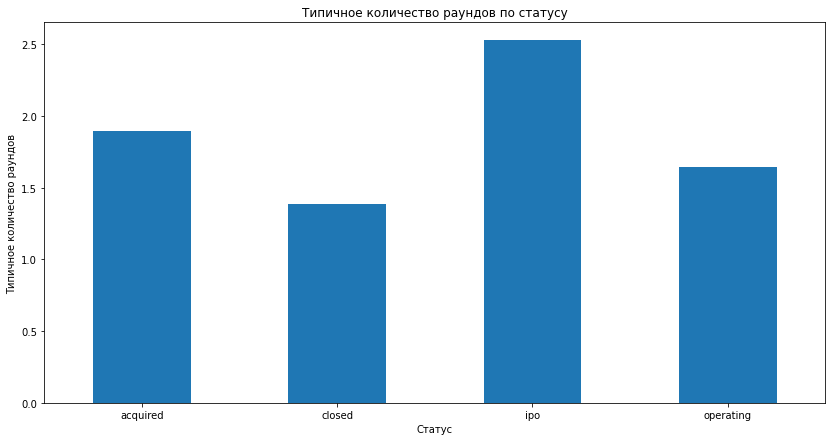

In [112]:
df_status.plot(kind='bar', x='status', y='funding_rounds', rot = 0, legend=False, figsize=(14, 7))

plt.title('Типичное количество раундов по статусу')
plt.xlabel('Статус')
plt.ylabel('Типичное количество раундов')

У компаний, выходящих на ipo наибольшее количество раундов финансирования(2), чем у приобретенных(1)


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.


1. **Предобработка данных**:
   - Были загружены и проанализированы данные из нескольких таблиц: `acquisition.csv`, `company_and_rounds.csv`, `people.csv`, `education.csv`, `degrees.csv`.
   - Проведена первичная обработка данных: исправлены названия столбцов, изменены типы данных, удалены дубликаты, проведен анализ пропусков.
   - Данные были разделены на две таблицы (`df_company` и `df_fund_rounds`) для удобства анализа и устранения дублирования информации.

2. **Анализ раундов финансирования**:
   - Построена сводная таблица по годам, отражающая типичный размер средств, выделяемых в рамках одного раунда финансирования, и общее количество раундов.
   - Выявлено, что максимальный типичный размер средств был в 2005 году, а в 2013 году наблюдался рост количества раундов при снижении среднего размера финансирования.

3. **Анализ данных о сотрудниках и их образовании**:
   - Проведена оценка полноты данных об образовании сотрудников. Компании были разделены на группы по количеству сотрудников, и выявлено, что в небольших стартапах (1-5 сотрудников) доля сотрудников без информации об образовании выше, чем в крупных компаниях.
   - Установлено, что таблица `degrees.csv` может быть присоединена для более детального анализа, но в текущем исследовании это не потребовалось.

4. **Анализ покупок стартапов**:
   - Исследованы компании, которые были проданы за 0 или 1 доллар, при этом имея ненулевой объем финансирования. Выявлено, что таких компаний 1618, и их медианное финансирование составляет 6 000 000 долларов.
   - Рассчитаны верхняя и нижняя границы выбросов для столбца `funding_total`, что позволило определить, что около 9% значений находятся выше верхней границы.

5. **Анализ цен стартапов по категориям**:
   - Выделены категории стартапов с типично высокими ценами и наибольшим разбросом цен. Типично высокими ценами характеризуются  стартапы по категориям `automotive`(2 400 000 000 USD), `sports`, `manofacturing`, и `real_estate`- более 400 000 000 USD. Наибольшим разбросом цен за стартап характеризуются категории стартапов `real_estate`-2 676 302 000, `automotive`, `health` и `semiconductor` .


6. **Анализ количества раундов финансирования**:
   - Исследовано типичное количество раундов финансирования для стартапов с разными статусами. Установлено, что у компаний, вышедших на IPO, количество раундов финансирования выше (2 раунда), чем у приобретенных компаний (1 раунд).

#### Выводы:
- **Раунды финансирования**: Наблюдается тенденция к увеличению количества раундов финансирования с течением времени, при этом средний размер финансирования снижается. Это может указывать на увеличение конкуренции и снижение доступности крупных инвестиций.
- **Образование сотрудников**: В небольших стартапах информация об образовании сотрудников менее полная, чем в крупных компаниях. Это может быть связано с тем, что небольшие стартапы менее формализованы и не всегда собирают данные о сотрудниках.
- **Покупки стартапов**: Компании, проданные за 0 или 1 доллар, часто имеют значительный объем финансирования. Это может быть связано с тем, что такие сделки могут быть частью стратегических приобретений или слияний, где цена не отражает реальной стоимости компании.
- **Цены стартапов**: Наибольшим разбросом цен за стартап характеризуются категории стартапов `real_estate`-2 676 302 000, `automotive`, `health` и `semiconductor`. Это может быть связано с высокими рисками и потенциальной доходностью таких инвестиций.
- **Количество раундов финансирования**: Компании, вышедшие на IPO, проходят больше раундов финансирования, чем приобретенные компании. Это может быть связано с необходимостью привлечения большего капитала для выхода на публичный рынок.

#### Рекомендации:
1. Обратить внимание на стартапы с большим количеством раундов финансирования, особенно те, которые готовятся к IPO. Такие компании могут быть более устойчивыми и иметь больший потенциал для роста. Рассмотреть возможность инвестирования в стартапы категории "Огромные", несмотря на высокие риски, так как они могут принести значительную прибыль.

2. Учитывать, что данные о сотрудниках и их образовании могут быть неполными, особенно в небольших стартапах. Это может повлиять на оценку потенциала компании. При анализе сделок с нулевой или минимальной ценой учитывать, что такие сделки могут быть частью стратегических приобретений, и цена не всегда отражает реальную стоимость компании.

#### Заключение:
Выводы, сделанные в ходе проекта, в целом подкрепляют друг друга и дают заказчику полезную информацию для принятия решений. Однако стоит учитывать, что данные неполны, и некоторые выводы могут быть искажены из-за пропусков и выбросов. Рекомендуется продолжить анализ с учетом дополнительных данных и более глубокого исследования причин, стоящих за наблюдаемыми тенденциями.